# Chapter 4. Training Models

## Two Ways to Train a Linear Regression Model:
1. Directly compute model parameters that best fit a model to the training set (minimizing the cost function)
2. Use Gradient Descent as an iterative approach that tweaks model parameters (converging on the same parameters)

Polynomial Regression: a complex model to fit non-linear datasets. Since it has more parameters than linear regression it is prone to overfitting.

We will look at several techniques to detect if the training data is overfit, and some regularization techniques to reduce the risk of overfitting.

***
*Linear Regression model prediction*

### ŷ = θ<sub>0</sub> + θ<sub>1</sub>x<sub>1</sub> + θ<sub>2</sub>x<sub>2</sub> + ⋯ + θ<sub>n</sub>x<sub>n</sub>

- ŷ is the predicted value
- n is the number of features
- x<sub>i</sub> is the feature value
- θ<sub>j</sub> is the model parameter
***

*Linear Regression model prediction (vectorized form)*

### ŷ =  h<sub>θ</sub>(x) = θ<sup>T</sup> · x


- θ is the model's parameter vector
- θ<sup>T</sup> is the transpose of θ
- x is the instances feature vector
- h<sub>θ</sub> is the hypothesis function using model parameters θ
***

We need to find the θ values that minimize the RMSE (root mean square error) of the model. In practice we minimize the MSE (mean square error) because it is easier, which ends up being the same as minimizing the RMSE.

### MSE ( X, h<sub>θ</sub> ) = $\frac{1}{m}$ $\sum_{i=1}^{m}$	( θ<sup>T</sup> ·x<sup>(i)</sup> - y<sup>(i)</sup> )<sup>2</sup> = MSE ( θ )


## The normal equation

To find the value of θ that minimized the cost function, this is the closed-form solution that gives the result directly.

### $\hat{θ}$  = ( X<sup>T</sup> · X ) <sup>-1</sup> · X<sup>T</sup> · y

- $\hat{θ}$ is the θ that minimized the cost function
- y is the vector of target values

### Lets generate some linear looking data to test the equation

In [26]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

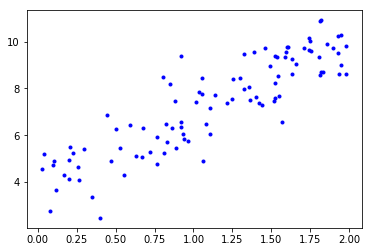

In [32]:
import matplotlib.pyplot as plt

plt.plot(X, y, 'b.')
plt.show()

### Now lets compute  $\hat{θ}$ using the normal equation

In [28]:
# np.linalg.inv() - compute inverse of matric
X_b = np.c_[np.ones((100, 1)), X] # add xθ = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [29]:
theta_best

array([[3.84384854],
       [3.09838704]])

θ<sub>0</sub> = 4 and θ<sub>1</sub> = 3 would be ideal
but the noise we generated has skewed our values to θ<sub>0</sub> = 3.84 and θ<sub>1</sub> = 3.09

### Lets make some predictions

In [30]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add xθ = 1 to each instance

y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.84384854],
       [10.04062262]])

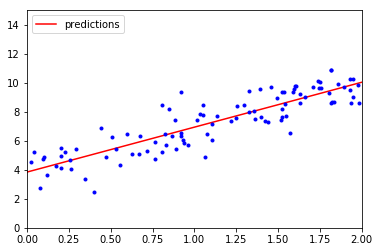

In [38]:
plt.plot(X_new, y_predict, "r-", label='predictions')
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.legend(loc='upper left')
plt.show()

### Equivalent Code in Scikit-Learn:

In [41]:
### Equivalent Scikit-Learn Code:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.84384854]), array([[3.09838704]]))

In [42]:
lin_reg.predict(X_new)

array([[ 3.84384854],
       [10.04062262]])

## Computational Complexity

Normal equation computes the inverse of X<sup>T</sup> · X, which is an n x n matrix (n = number of features). The computational complexity of inverting this matrix is about O(n<sup>2.3</sup>) to O(n<sup>3</sup>).

In other words, if you double the features then you multiply the computational work by 5.3 to 8 times!

The good news is that the equation is linear with respect to the number of instances in the training data, ( O(m) ) and with respect to the number of predictions.

## Gradient Descent

In [43]:
# page 129